## Import Usefull All Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats
import datetime
from sklearn import tree

from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV as CCV
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

## Mount the Drive

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## Read the Data

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
data = data.drop('#', axis=1)


In [6]:
data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
data.shape

(800, 12)

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


In [10]:
data.dropna(inplace = True)

In [11]:
data.shape

(414, 12)

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,456.63,70.65,83.17,79.68,77.05,75.57,70.51,3.41
std,120.85,22.90,33.70,32.59,33.81,27.95,28.52,1.66
min,190.00,1.00,10.00,15.00,10.00,20.00,5.00,1.00
25%,355.00,55.00,59.25,55.00,50.00,55.00,50.00,2.00
50%,475.00,70.00,80.00,75.50,70.00,75.00,70.00,3.00
75%,529.50,85.00,103.00,100.00,100.00,94.75,91.00,5.00
max,780.00,150.00,190.00,230.00,180.00,230.00,160.00,6.00


In [13]:
data["Legendary"].value_counts().sort_values(ascending = False)

,count
Legendary,
False,374
True,40


## BALANCING-DATA

In [14]:
balancing_data = pd.DataFrame()
for class_con in data["Legendary"].unique():

  class_data = data[data["Legendary"] == class_con]
  if len(class_data) > 500:
   sample_data = class_data.sample(n = 500, random_state = 42, replace = False)
  else :
    sample_data = class_data.sample(n = 500, random_state = 42, replace = True)
  balancing_data = pd.concat([balancing_data, sample_data])


In [15]:
balancing_data["Legendary"].value_counts()

,count
Legendary,
False,500
True,500


In [16]:
balancing_data["Legendary"]

,Legendary
224,False
758,False
591,False
230,False
153,False
...,...
425,True
419,True
417,True
707,True


In [17]:
balancing_data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,539.33,81.38,99.78,88.41,98.71,88.26,82.78,3.79
std,132.59,25.11,36.24,29.39,39.33,29.59,26.80,1.63
min,195.00,1.00,10.00,15.00,10.00,20.00,5.00,1.00
25%,460.00,62.00,75.75,70.00,65.00,68.50,65.00,3.00
50%,580.00,80.00,100.00,90.00,100.00,90.00,90.00,4.00
75%,630.00,100.00,120.00,100.00,130.00,105.00,101.00,5.00
max,780.00,150.00,190.00,230.00,180.00,230.00,160.00,6.00


In [18]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 224 to 427
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1000 non-null   object
 1   Type 1      1000 non-null   object
 2   Type 2      1000 non-null   object
 3   Total       1000 non-null   int64 
 4   HP          1000 non-null   int64 
 5   Attack      1000 non-null   int64 
 6   Defense     1000 non-null   int64 
 7   Sp. Atk     1000 non-null   int64 
 8   Sp. Def     1000 non-null   int64 
 9   Speed       1000 non-null   int64 
 10  Generation  1000 non-null   int64 
 11  Legendary   1000 non-null   bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 94.7+ KB


In [19]:
balancing_data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
758,Binacle,Rock,Water,306,42,52,67,39,56,50,6,False
591,AudinoMega Audino,Normal,Fairy,545,103,60,126,80,126,50,5,False
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
153,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False


## DATA-SPLITTING

In [20]:


from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

y = balancing_data["Legendary"]
x = balancing_data.drop(["Name", "Legendary"], axis = 1)

x_train,x_temp,y_train,y_temp = train_test_split(x,y, test_size = 0.5, stratify = y, random_state = 42)
x_test,x_cv,y_test,y_cv = train_test_split(x_temp,y_temp, test_size = 0.4, stratify =y_temp, random_state = 42)

print("Train Set Size:", x_train.shape)
print("Test Set Size:", x_test.shape)
print("CV Set Size:", x_cv.shape)


Train Set Size: (500, 10)
Test Set Size: (300, 10)
CV Set Size: (200, 10)


## LabelEncoder

In [21]:
# Intialize the LabelEnocder

le = LabelEncoder()
balancing_data["Type 1"] = le.fit_transform(balancing_data["Type 1"])
balancing_data["Type 2"] = le.fit_transform(balancing_data["Type 2"])
balancing_data["Legendary"] = le.fit_transform(balancing_data["Legendary"])

In [22]:
le_columns = ["Type 1", "Type 2", "Legendary"]
for i in le_columns:
  balancing_data[i] = le.fit_transform(balancing_data[i])

In [23]:
x_train.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
279,Fire,Fighting,630,80,160,80,130,80,100,3
794,Dragon,Ground,600,108,100,121,81,95,95,6
278,Fire,Fighting,530,80,120,70,110,70,80,3
540,Steel,Dragon,680,100,120,120,150,100,90,4
712,Dragon,Ice,700,125,120,90,170,100,95,5


## Co-Relation of Data

<Axes: >

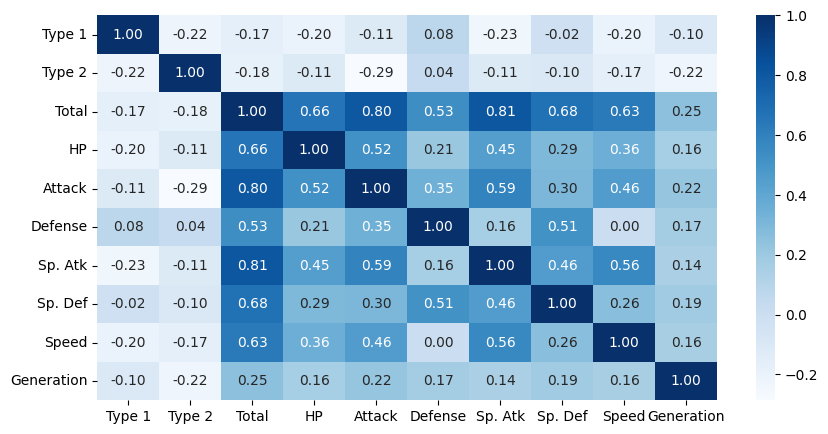

In [24]:
# Apply Label Encoding to categorical features in x_train before calculating correlation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # Initialize LabelEncoder

# Apply Label Encoding to 'Type 1' and 'Type 2' columns in x_train
for column in ['Type 1', 'Type 2']:
    x_train[column] = le.fit_transform(x_train[column])

# Now calculate and plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(x_train.corr(), annot=True, fmt=".2f", cmap='Blues')

## KNN Without Optimal-K

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical features in all sets
for column in ["Type 1", "Type 2"]:
    # Fit on the combined data of x_train and x_test and transform all sets
    combined_data = pd.concat([x_train[column], x_test[column], x_cv[column]], ignore_index=True)
    # Convert the combined data to strings before fitting the LabelEncoder
    combined_data = combined_data.astype(str)
    le.fit(combined_data)
    x_train[column] = le.transform(x_train[column].astype(str))
    x_test[column] = le.transform(x_test[column].astype(str))
    x_cv[column] = le.transform(x_cv[column].astype(str))


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_test_pred = knn.predict(x_test)
y_cv_pred = knn.predict(x_cv)

test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"CV Accuracy: {cv_accuracy:.4f}")

Test Accuracy: 0.9567
CV Accuracy: 0.9750


## Find Optimal-K

Optimal-k for knn is: 5


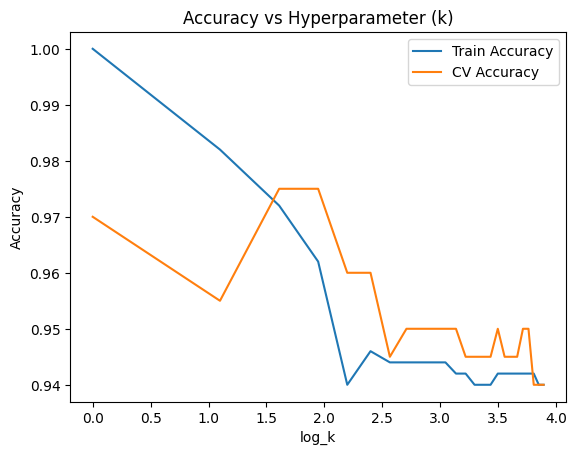

In [27]:



import math
k = list(range(1,50,2))

train_accuracy = []
cv_accuracy = []

for i in k:
  clf = KNeighborsClassifier(n_neighbors = i)
  clf.fit(x_train, y_train)
  y_train_pred = clf.predict(x_train)
  y_cv_pred = clf.predict(x_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_k = k[cv_accuracy.index(max(cv_accuracy))] # Calculate optimal_k outside the loop
print("Optimal-k for knn is:", optimal_k)

log_k = [math.log(x) for x in k]

# Move plotting outside the loop
plt.plot(log_k,train_accuracy, label = "Train Accuracy")
plt.plot(log_k, cv_accuracy,label = "CV Accuracy")
plt.title("Accuracy vs Hyperparameter (k)")
plt.xlabel("log_k")
plt.ylabel("Accuracy")
plt.legend()

## KNN Using Optimal-K

In [28]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(x_train,y_train)

import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(knn, f)


y_test_pred = knn.predict(x_test)
y_cv_pred = knn.predict(x_cv)

y_test_accuracy = accuracy_score(y_test,y_test_pred)
y_cv_accuracy = accuracy_score(y_cv,y_cv_pred)

y_test_precision = precision_score(y_test,y_test_pred,average = "macro")
y_cv_precision = precision_score(y_cv,y_cv_pred,average = "macro")

y_test_recall = recall_score(y_test,y_test_pred, average = "macro")
y_cv_recall = recall_score(y_cv,y_cv_pred, average = "macro")

print("Accuracy Score:")
print(f"Test Accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")


print("Precision Score:")
print(f"Test Precision Score is:{y_test_precision:.4f}")
print(f"CV Precision Score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall Score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

col=["Model","Test Accuracy","CV Accuracy","Test Presision","CV Precision","Test Recall","CV Recall"]

batch1=pd.DataFrame([["KNN",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Accuracy Score:
Test Accuracy score is:0.9567
CV accuracy score is:0.9750
Precision Score:
Test Precision Score is:0.9601
CV Precision Score is:0.9762
Recall Score:
Test Recall Score is:0.9567
CV Recall score is:0.9750


## Confusion Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

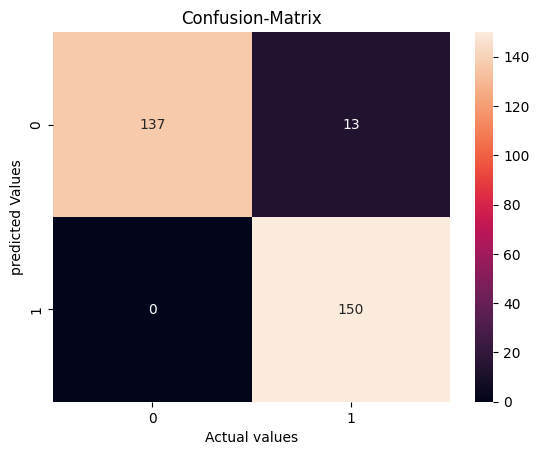

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

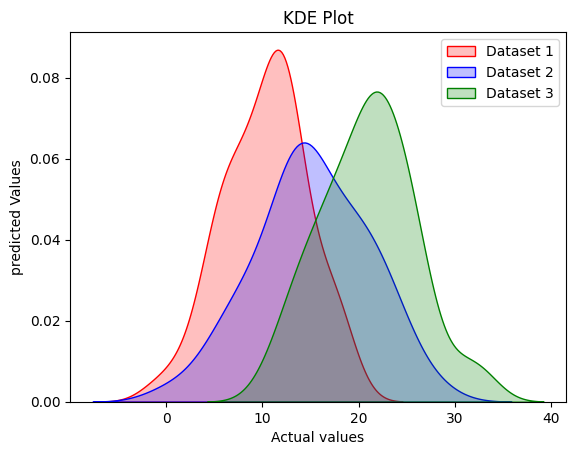

In [30]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()


## Navie Bayes Without Optimal-Alpha

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(x_train, y_train)
y_test_pred = nb.predict(x_test)
y_cv_pred = nb.predict(x_cv)

print("Test Accuracy score is:", accuracy_score(y_test,y_test_pred))
print("CV Accuracy score is:", accuracy_score(y_cv,y_cv_pred))


Test Accuracy score is: 0.5966666666666667
CV Accuracy score is: 0.605


## Find Optimal Alpha

optimal_alpha is: 1000


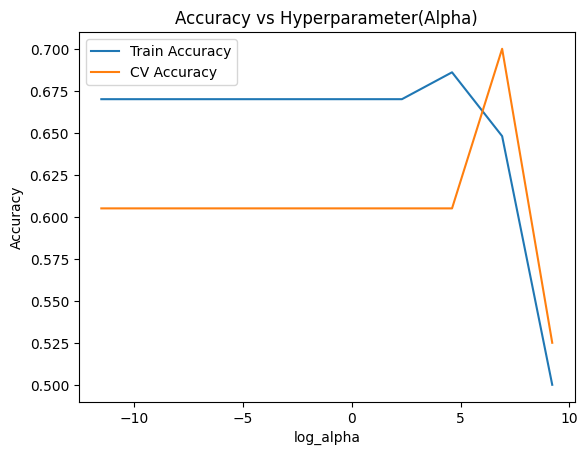

In [32]:


alpha=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]
train_accuracy = [] # Re-initialize train_accuracy for this cell
cv_accuracy = []
for i in alpha:
  clf = MultinomialNB(alpha = i)
  clf.fit(x_train,y_train)
  y_train_pred = clf.predict(x_train)
  y_cv_pred = clf.predict(x_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_alpha=alpha[cv_accuracy.index(max(cv_accuracy))]
print("optimal_alpha is:",optimal_alpha)

log_alpha = [math.log(x) for x in alpha]
plt.plot(log_alpha,train_accuracy,label = "Train Accuracy") # Now log_alpha and train_accuracy have the same length
plt.plot(log_alpha,cv_accuracy,label = "CV Accuracy")
plt.title("Accuracy vs Hyperparameter(Alpha)")
plt.xlabel("log_alpha")
plt.ylabel("Accuracy")
plt.legend()

## Naive Bayes by Using Hyperparameter Alpha Value

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=optimal_alpha)

nb.fit(x_train,y_train)
y_test_pred=nb.predict(x_test)
y_cv_pred=nb.predict(x_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="micro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="micro")

y_test_recall=recall_score(y_test,y_test_pred,average="micro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="micro")


print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

col=["Model","Test Accuracy","CV Accuracy","Test Presision","CV Precision","Test Recall","CV Recall"]
batch2=pd.DataFrame([["Naive Bayes",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.6367
CV accuracy score is:0.7000
Precision Score:
Test Precision score is:0.6367
CV Precision score is:0.7000
Recall Score:
Test Recall score is:0.6367
CV Recall score is:0.7000


## Confusion Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

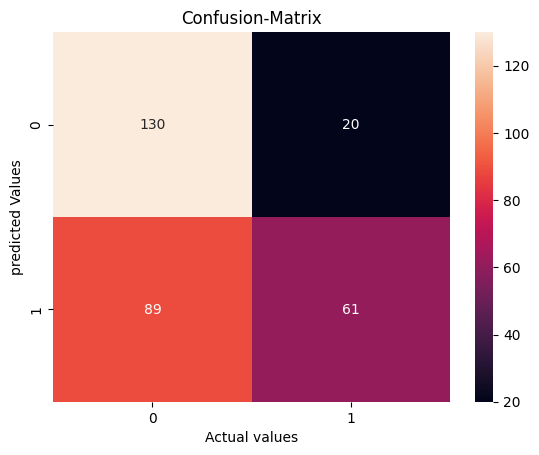

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

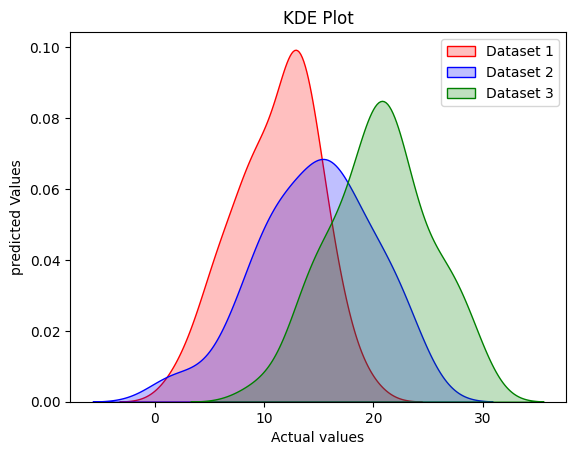

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## LOSS(L1)
## LOGISTIC REGRESSION WITHOUT HYPERPARAMETER TUNING

In [36]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(penalty="l1",solver="liblinear")

lor.fit(x_train,y_train)

y_test_pred=lor.predict(x_test)
y_cv_pred=lor.predict(x_cv)

print("Test accuracy is:",accuracy_score(y_test,y_test_pred))
print("CV accuracy is:",accuracy_score(y_cv,y_cv_pred))

Test accuracy is: 0.83
CV accuracy is: 0.895


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## FIND Optimal-C

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


optimal_c is: 0.1


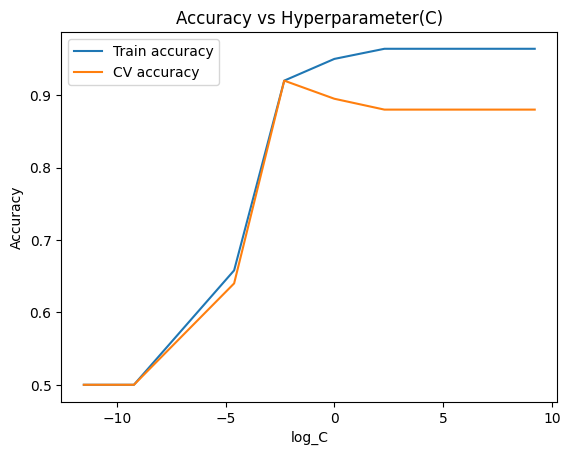

In [37]:
C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=LogisticRegression(C=i,penalty="l1",solver="liblinear")
  # Use x_train and x_cv instead of X_train and X_cv
  clf.fit(x_train,y_train)
  y_train_pred=clf.predict(x_train)
  y_cv_pred=clf.predict(x_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("optimal_c is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.ylabel("Accuracy")
plt.legend()

## LOGISTIC REGRESSION BY USING HYPEPARAMETER TUNING

In [38]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(C=optimal_C,penalty="l1",solver="liblinear")

lor.fit(x_train,y_train)
y_test_pred=lor.predict(x_test)
y_cv_pred=lor.predict(x_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch3=pd.DataFrame([["Logistic Regression-L1",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.8667
CV accuracy score is:0.9200
Precision Score:
Test Precision score is:0.8667
CV Precision score is:0.9207
Recall Score:
Test Recall score is:0.8667
CV Recall score is:0.9200


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## CONFUSION MATRIX FOR(L1)

Text(50.722222222222214, 0.5, 'predicted Values')

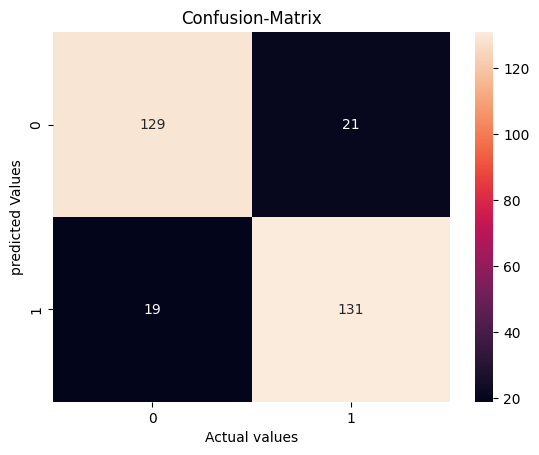

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

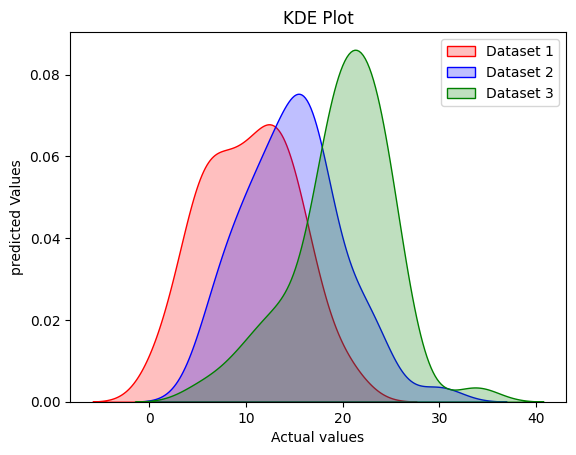

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## LOGISTIC REGRESSION WITHOUT HYPERPARAMETER TUNING(L2)

In [41]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(penalty="l2",solver="saga")

lor.fit(x_train,y_train)
y_test_pred=lor.predict(x_test)
y_cv_pred=lor.predict(x_cv)

print("Test accuracy is:",accuracy_score(y_test,y_test_pred))
print("CV accuracy is:",accuracy_score(y_cv,y_cv_pred))

Test accuracy is: 0.6133333333333333
CV accuracy is: 0.64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Finding Optimal-C

optimal_c is: 0.0001


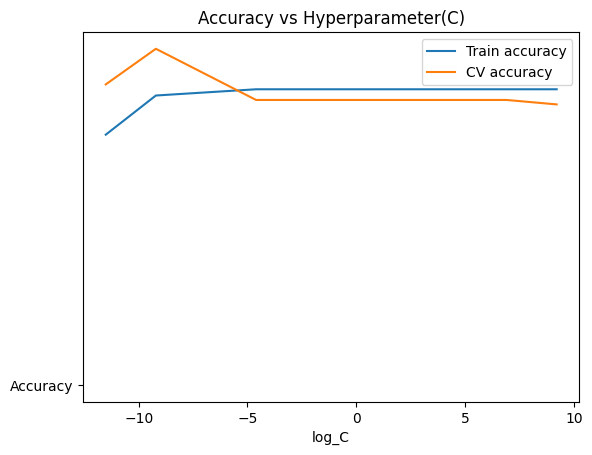

In [42]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Suppress all warnings (not recommended)
warnings.filterwarnings("ignore")

C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=LogisticRegression(C=i,penalty = "l2",solver="saga")
  clf.fit(x_train,y_train)
  y_train_pred=clf.predict(x_train)
  y_cv_pred=clf.predict(x_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("optimal_c is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()


## LOGISTIC REGRESSION BY USING HYPERPARAMETER OPTIMAL-C

In [43]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(C=optimal_C,solver="saga",penalty = "l2")

lor.fit(x_train,y_train)
y_test_pred=lor.predict(x_test)
y_cv_pred=lor.predict(x_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch4=pd.DataFrame([["Logistic Regression-L2",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.6967
CV accuracy score is:0.7550
Precision Score:
Test Precision score is:0.7014
CV Precision score is:0.7581
Recall Score:
Test Recall score is:0.6967
CV Recall score is:0.7550


## CONFUSION MATRIX

Text(50.722222222222214, 0.5, 'predicted Values')

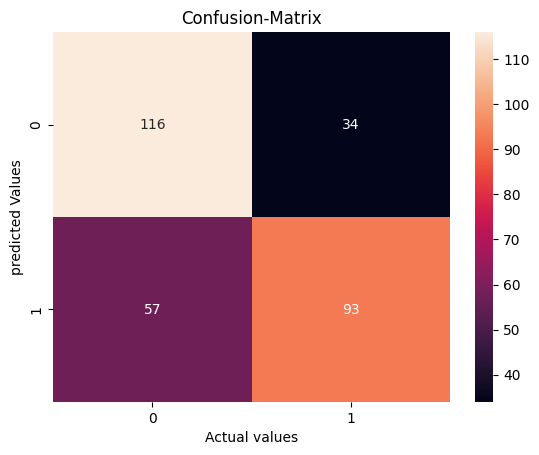

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

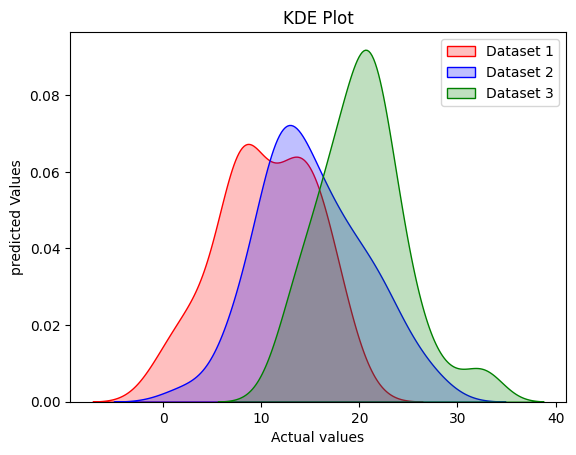

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## ELASTICNET(L1 & L2)

In [46]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(solver="saga",penalty="elasticnet",l1_ratio=0.5)

lor.fit(x_train,y_train)
y_test_pred=lor.predict(x_test)
y_cv_pred=lor.predict(x_cv)

print("Test accuracy is:",accuracy_score(y_test,y_test_pred))
print("CV accuracy is:",accuracy_score(y_cv,y_cv_pred))

Test accuracy is: 0.6133333333333333
CV accuracy is: 0.64


## Finding Optimal-C

optimal_c is: 0.01


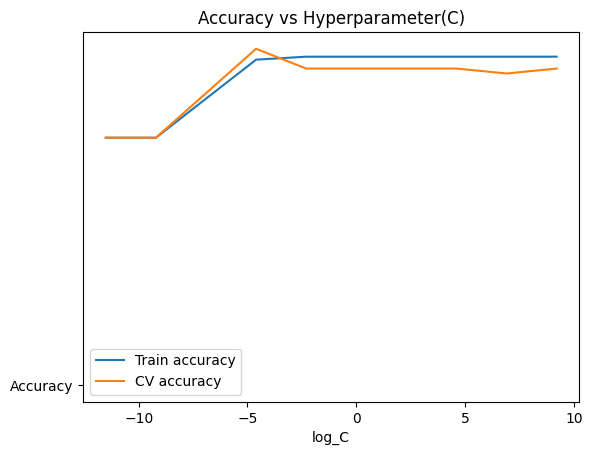

In [47]:
C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=LogisticRegression(C=i,solver="saga",penalty="elasticnet",l1_ratio=0.5)
  clf.fit(x_train,y_train)
  y_train_pred=clf.predict(x_train)
  y_cv_pred=clf.predict(x_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("optimal_c is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()

## BY USING OPTIMAL-C

In [48]:
from sklearn.linear_model import LogisticRegression

lor=LogisticRegression(C=optimal_C,solver="saga",penalty="elasticnet",l1_ratio=0.5)

lor.fit(x_train,y_train)
y_test_pred=lor.predict(x_test)
y_cv_pred=lor.predict(x_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch5=pd.DataFrame([["Logistic Regression-L1&l2",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.6233
CV accuracy score is:0.6800
Precision Score:
Test Precision score is:0.6859
CV Precision score is:0.7283
Recall Score:
Test Recall score is:0.6233
CV Recall score is:0.6800


## CONFUSION MATRIX

Text(50.722222222222214, 0.5, 'predicted Values')

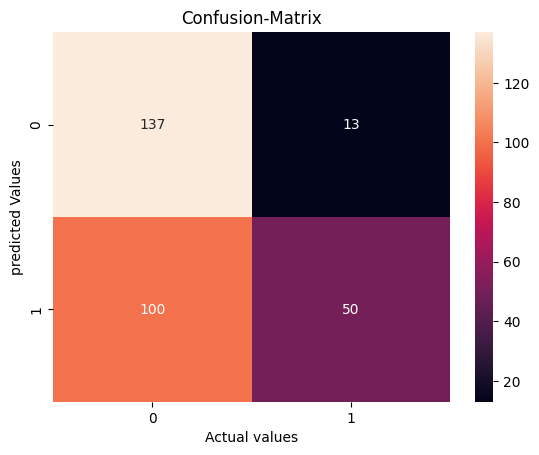

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

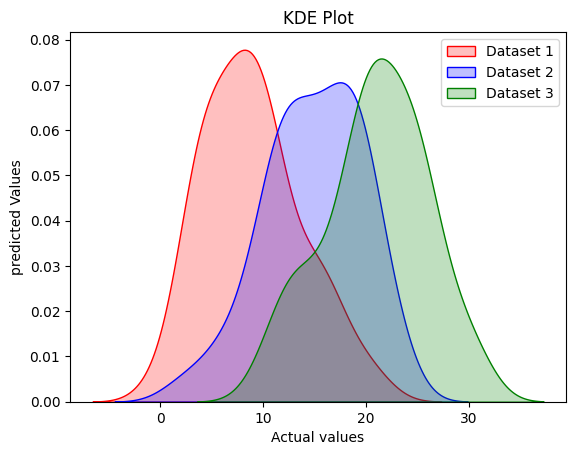

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## Linear SVM

In [51]:
from sklearn.svm import LinearSVC


clf=LinearSVC(C=i)
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_cv_pred=clf.predict(x_cv)
y_test_accuracy = accuracy_score(y_train,y_train_pred)


## Find the Optimal-C

Optimal-C is: 0.1


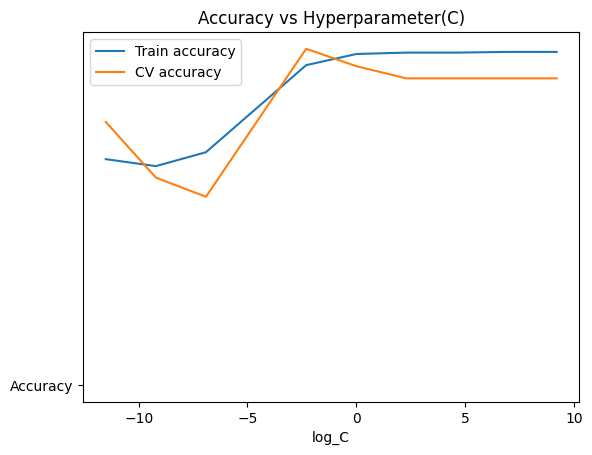

In [52]:
C=[10000,1000,100,10,1,0.1,0.001,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=LinearSVC(C=i)
  clf.fit(x_train,y_train)
  y_train_pred=clf.predict(x_train)
  y_cv_pred=clf.predict(x_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("Optimal-C is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()

## Linear SVM by using Optimal-C

In [53]:
from sklearn.svm import LinearSVC

linear_svc=LinearSVC(C=optimal_C,random_state=40)

linear_svc.fit(x_train,y_train)
y_test_pred=linear_svc.predict(x_test)
y_cv_pred=linear_svc.predict(x_cv) # Changed _cv to x_cv

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch6=pd.DataFrame([["Linear SVM (kernal=Linear)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.9100
CV accuracy score is:0.9650
Precision Score:
Test Precision score is:0.9237
CV Precision score is:0.9673
Recall Score:
Test Recall score is:0.9100
CV Recall score is:0.9650


## Confusion-Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

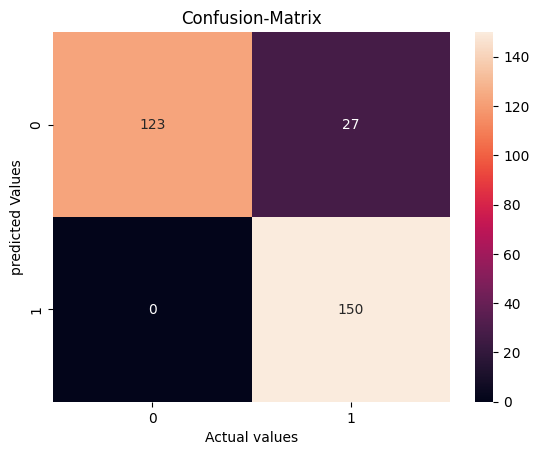

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

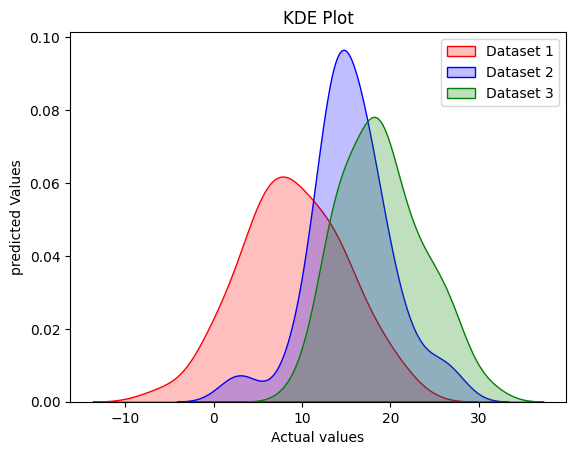

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## Kernal = RBF


In [55]:
from sklearn.svm import SVC

linear_svc=SVC(kernel="rbf",random_state=42)

linear_svc.fit(x_train,y_train)
y_test_pred=linear_svc.predict(x_test)
y_cv_pred=linear_svc.predict(x_cv)

print("Accuracy Score is:",accuracy_score(y_test,y_test_pred))
print("CV score is:",accuracy_score(y_cv,y_cv_pred))

Accuracy Score is: 0.9333333333333333
CV score is: 0.95



## Find Optimal-C

Optimal-C is: 10000


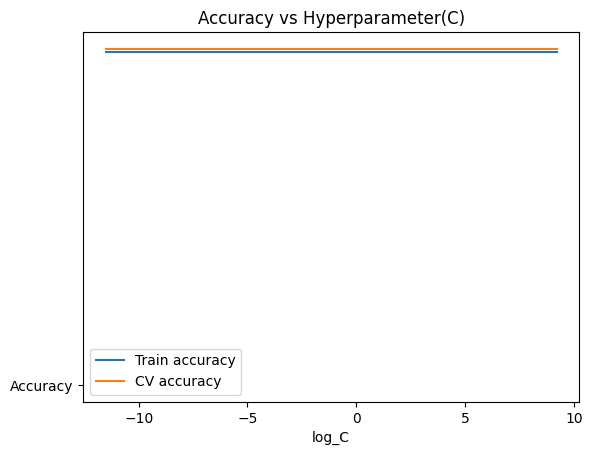

In [56]:
C=[10000,1000,100,10,1,0.1,0.001,0.0001,0.00001]

train_accuracy=[]
cv_accuracy=[]

for i in C:
  clf=SVC(kernel="rbf",random_state=42)
  clf.fit(x_train,y_train)
  y_train_pred=clf.predict(x_train)
  y_cv_pred=clf.predict(x_cv)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  cv_accuracy.append(accuracy_score(y_cv,y_cv_pred))

optimal_C=C[cv_accuracy.index(max(cv_accuracy))]

print("Optimal-C is:",optimal_C)

log_C=[math.log(x) for x in C]
plt.plot(log_C,train_accuracy,label="Train accuracy")
plt.plot(log_C,cv_accuracy,label="CV accuracy")
plt.title("Accuracy vs Hyperparameter(C)")
plt.xlabel("log_C")
plt.plot("Accuracy")
plt.legend()

## Linear SVM by using Optimal-c

In [57]:
from sklearn.svm import SVC

linear_svc=SVC(C=optimal_C,random_state=40)

linear_svc.fit(x_train,y_train)
y_test_pred=linear_svc.predict(x_test)
y_cv_pred=linear_svc.predict(x_cv)

y_test_accuracy=accuracy_score(y_test,y_test_pred)
y_cv_accuracy=accuracy_score(y_cv,y_cv_pred)

y_test_precision=precision_score(y_test,y_test_pred,average="macro")
y_cv_precision=precision_score(y_cv,y_cv_pred,average="macro")

y_test_recall=recall_score(y_test,y_test_pred,average="macro")
y_cv_recall=recall_score(y_cv,y_cv_pred,average="macro")

print("Acuuracy Score:")
print(f"Test accuracy score is:{y_test_accuracy:.4f}")
print(f"CV accuracy score is:{y_cv_accuracy:.4f}")

print("Precision Score:")
print(f"Test Precision score is:{y_test_precision:.4f}")
print(f"CV Precision score is:{y_cv_precision:.4f}")

print("Recall Score:")
print(f"Test Recall score is:{y_test_recall:.4f}")
print(f"CV Recall score is:{y_cv_recall:.4f}")

batch7=pd.DataFrame([["Linear SVM (kernal=RBF)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

Acuuracy Score:
Test accuracy score is:0.8600
CV accuracy score is:0.8900
Precision Score:
Test Precision score is:0.8906
CV Precision score is:0.9098
Recall Score:
Test Recall score is:0.8600
CV Recall score is:0.8900


## Confusion-Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

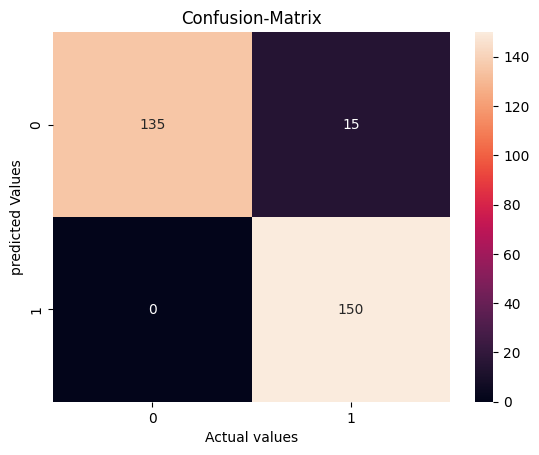

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

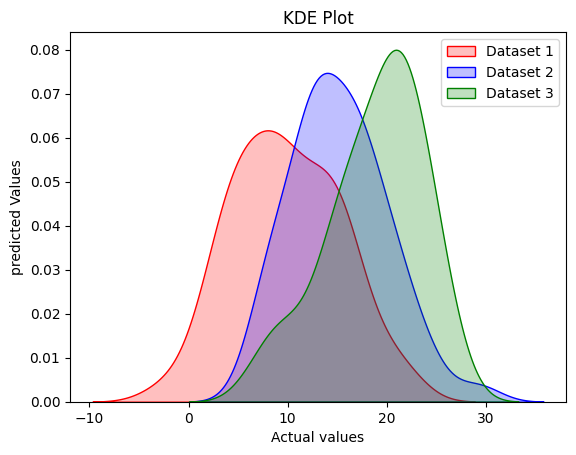

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## Dession Tree
## Find Hyperparameter Tuning(GridSearch)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(x_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 10


## By Using Hyperparameter Tuning

In [59]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(x_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch8=pd.DataFrame([["Dession Tree(GridSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## Confusion-Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

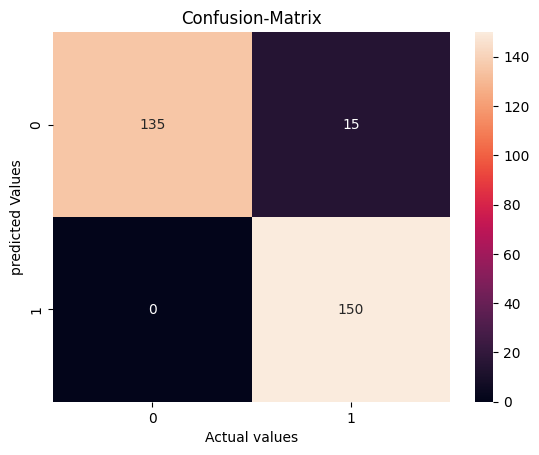

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

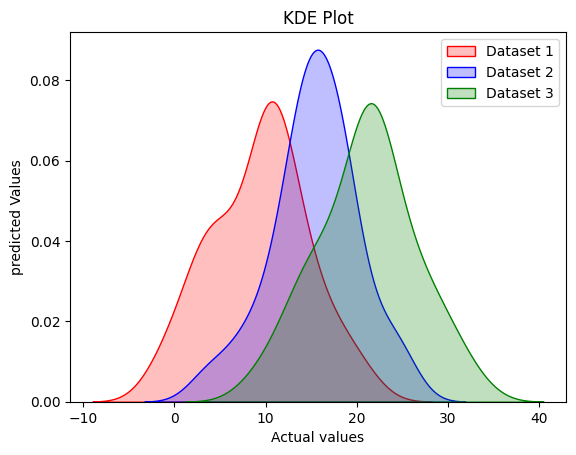

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## Dession Tree(RandomSearch)
## Find Optimal-C

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(x_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 10


##Dession Tree(RandomSearch)
## By Using Hyperparameter Tuning

In [61]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(x_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch9=pd.DataFrame([["Dession Tree(RandomSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## Confusion-Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

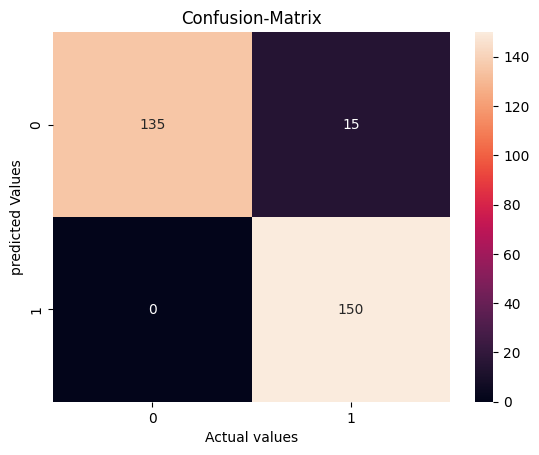

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

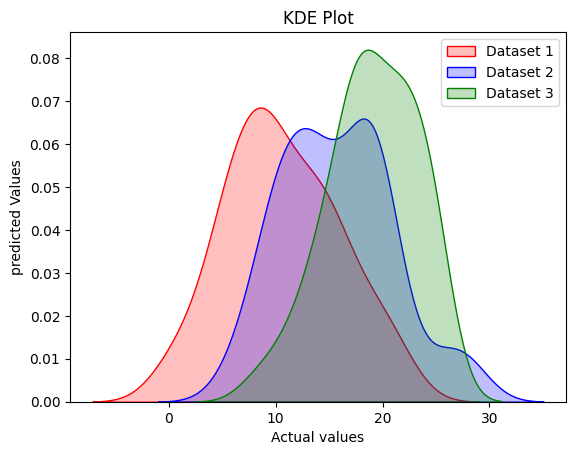

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## Random Forest(GridSearch)
## Find Hyperparameter

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(x_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 10


## By Using Hyperparameter(GridSearch)

In [63]:
clf = RandomForestClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(x_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch10=pd.DataFrame([["Random Forest(GridSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## Confusion-Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

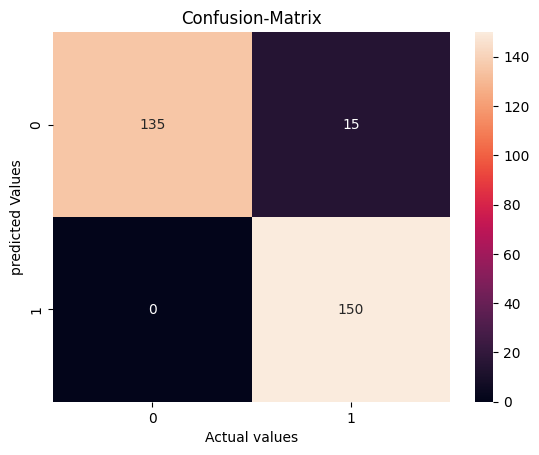

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

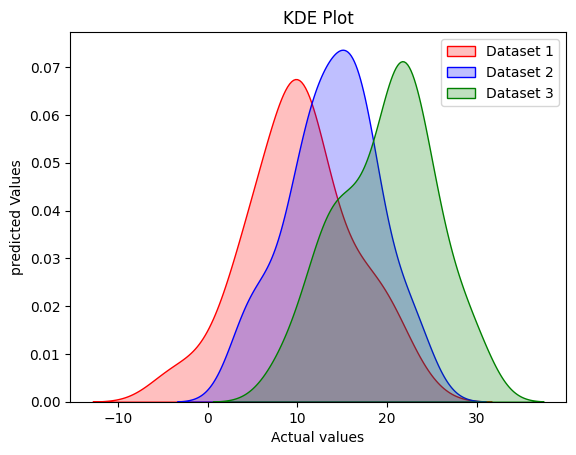

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## RandomForest(RandomSearch)
## Find Hyperparameter Tuning


In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(x_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 5
optimal max_depth 10


## By Using Hyperparameter Tuning(RandomSearch)

In [65]:
clf = RandomForestClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(x_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_cv_pred = clf.predict(x_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')

batch11=pd.DataFrame([["RandomForest(RandomSearch)",y_test_accuracy,y_cv_accuracy,y_test_precision,y_cv_precision,y_test_recall,y_cv_recall]],columns=col)

## Confusion-Matrix

Text(50.722222222222214, 0.5, 'predicted Values')

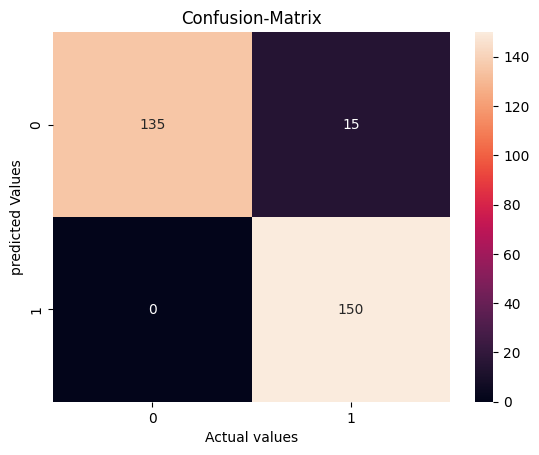

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion-Matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")

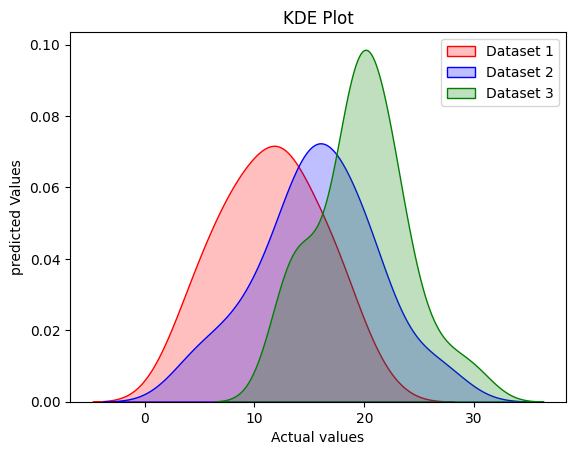

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Generate two datasets
data1 = np.random.normal(10, 5, 50)
data2 = np.random.normal(15, 5, 50)
data3 = np.random.normal(20, 5, 50)

# Create KDE plots with different colors
sns.kdeplot(data1, fill=True, color="red", label="Dataset 1")
sns.kdeplot(data2, fill=True, color="blue", label="Dataset 2")
sns.kdeplot(data3, fill=True, color="green", label="Dataset 3")

# Labels and title
plt.title("KDE Plot")
plt.xlabel("Actual values")
plt.ylabel("predicted Values")
plt.legend()

plt.show()

## Performance Tabel

In [78]:
results=pd.DataFrame()
results=pd.concat([results,batch1,batch2,batch3,batch4,batch5,batch6,batch7,batch8,batch9,batch10,batch11],ignore_index=True)
results.sort_values(by = ["Test Accuracy"], ascending = False)
results = results.reset_index(drop = True)
results

,Model,Test Accuracy,CV Accuracy,Test Presision,CV Precision,Test Recall,CV Recall
0,KNN,0.96,0.97,0.96,0.98,0.96,0.97
1,Naive Bayes,0.64,0.70,0.64,0.70,0.64,0.70
2,Logistic Regression-L1,0.87,0.92,0.87,0.92,0.87,0.92
3,Logistic Regression-L2,0.70,0.76,0.70,0.76,0.70,0.76
4,Logistic Regression-L1&l2,0.62,0.68,0.69,0.73,0.62,0.68
5,Linear SVM (kernal=Linear),0.91,0.96,0.92,0.97,0.91,0.97
6,Linear SVM (kernal=RBF),0.86,0.89,0.89,0.91,0.86,0.89
7,Dession Tree(GridSearch),0.86,0.89,0.89,0.91,0.86,0.89
8,Dession Tree(RandomSearch),0.86,0.89,0.89,0.91,0.86,0.89
9,Random Forest(GridSearch),0.86,0.89,0.89,0.91,0.86,0.89
